# Lecture 2
## Esercizio 02.1

Vogliamo calcolare l'integrale $$I=\int_0^1 \frac{\pi}{2}\cos\left({\frac{\pi}{2}x}\right) dx$$ in due modi differenti:
1. distribuzione uniforme in $[0,1]$
2. importance sampling (probabilità non uniforme in $[0,1]$)

Ripetiamo il procedimento $M=10^4$ volte e usiamo il metodo a blocchi ($N=100$ blocchi) per valutare le incertezze.
Per quanto rigurda la scelta della funzione necessaria per adoperare l'importance sampling, notiamo che sviluppando l'integranda con Taylor in $x=1$ essa risulta $\propto \frac{\pi^2}{4}(1-x)$. Poichè $\int_0^1 \frac{\pi^2}{4}(1-x) dx = \frac{\pi^2}{8}$, se richiediamo che la funzione sia normalizzata (oltre che positiva sull'intervallo) otteniamo $$p(x)=2(1-x)$$

La distribuzione cumulativa è $$y=F_x(x)=\int_0^{x}p(x)dx=2x-x^2$$ che si può invertire per $x \in [0,1]$ ottenendo $$x=F_x^{-1}(y)=1+\sqrt{1-y}$$
Se estraiamo $y$ uniformemente in $[0,1)$ possiamo quindi ottenere una variabile casuale $x$ distribuita secondo $p(x)=2(1-x)$ ed applicare il metodo dell'importance sampling per valutare l'integrale.

Compariamo graficamente la funzione originaria e quella adottata per l'importance sampling:

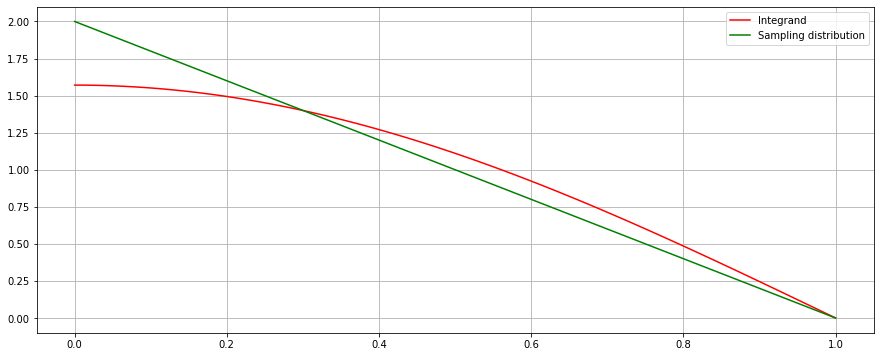

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,100)
OR = np.pi/2. * np.cos(np.pi/2. * x)
IS = 2 * (1-x)

plt.figure(figsize=(15,6))
plt.plot(x,OR, color='red')
plt.plot(x,IS, color='green')
plt.grid()
plt.legend(['Integrand','Sampling distribution'])

plt.show()

Mostriamo i risultati per la distribuzione uniforme e per l'importance sampling:

Last block estimate: 0.997939 , error: 0.00528403


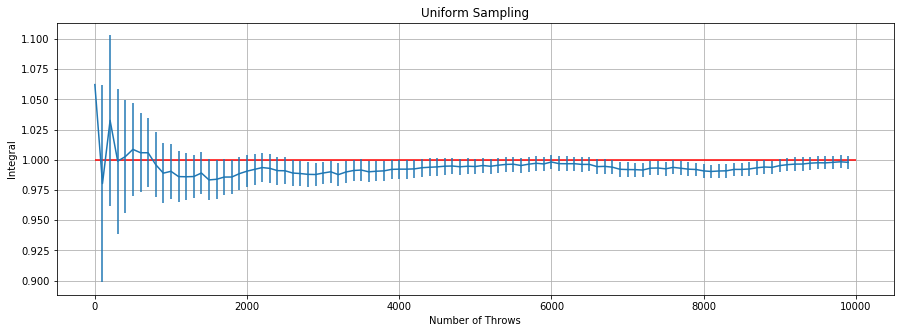

In [2]:
x1,y1,error1=np.loadtxt("data_unif.out", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(figsize=(15,5))
plt.hlines(1,0,1E4, color='red')
plt.errorbar(x1,y1,yerr=error1)
plt.title('Uniform Sampling')
plt.xlabel('Number of Throws')
plt.ylabel('Integral')
plt.grid(True)

print("Last block estimate:",y1[-1],", error:",error1[-1])

plt.show()

Notiamo che la stima risulta compatibile con il valore atteso entro l'incertezza statistica.

Last block estimate: 1.00054 , error: 0.00138189


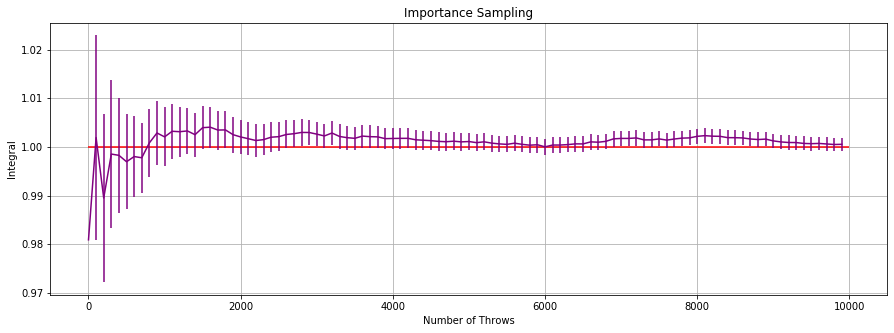

In [3]:
x2,y2,error2=np.loadtxt("data_samp.out", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(figsize=(15,5))
plt.hlines(1,0,1E4, color='red')
plt.errorbar(x2,y2,yerr=error2, color='purple')
plt.title('Importance Sampling')
plt.xlabel('Number of Throws')
plt.ylabel('Integral')
plt.grid(True)

print("Last block estimate:",y2[-1],", error:",error2[-1])

plt.show()

Nuovamente, la stima effettuata risulta compatibile con il valore atteso entro l'incertezza statistica.
Mi pare interessante porre a confronto le due soluzioni per sottolineare anche graficamente come, utilizzando l'importance sampling, si abbia una convergenza più immediata e un errore (sull'ultimo blocco) di gran lunga minore rispetto alla distribuzione uniforme.

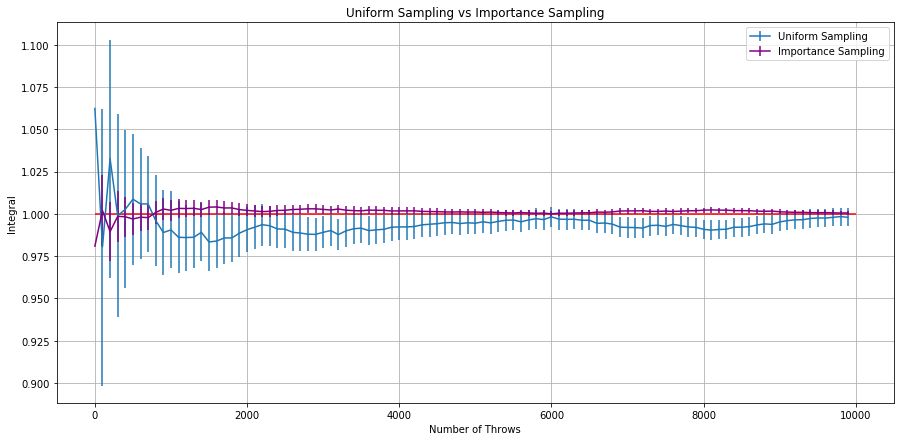

In [4]:
plt.figure(figsize=(15,7))
plt.hlines(1,0,1E4, color='red')
plt.errorbar(x1,y1,yerr=error1,label='Uniform Sampling')
plt.errorbar(x2,y2,yerr=error2,label='Importance Sampling', color='purple')
plt.title('Uniform Sampling vs Importance Sampling')
plt.xlabel('Number of Throws')
plt.ylabel('Integral')
plt.legend()
plt.grid(True)

plt.show()

## Esercizio 02.2

Vogliamo simulare un random walk in uno spazio discreto ($\mathbb{Z}^3$) e in uno spazio continuo ($\mathbb{R}^3$).

Nel caso discreto, il walker ad ogni step può spostarsi di una quantità pari alla distanza reticolare $a=1$ nelle direzioni degli assi cartesiani, in entrambi i versi. Poichè stiamo considerando un sistema isotropo ogni step consiste di 6 possibilità equiprobabili e può quindi essere rappresentato dal lancio di un dado standard.

Nel caso continuo invece il walker può spostarsi di una quantità $a=1$ in una qualsiasi direzione. Ad ogni step bisogna quindi randomicamente estrarre in modo uniforme un punto sulla sfera di raggio unitario che individua la direzione del passo. Notiamo che estraendo uniformemente due numeri in $[0,\pi)$ e $[0, 2\pi)$ non si segue di fatto una distribuzione uniforme sulla sfera, in quanto i punti risultano più concentrati ai poli. Per ovviare a questo problema, si estraggono uniformemente dei punti nel cubo $\vec{x} \in [-1,1)\times[-1,1)\times[-1,1)$ fino a soddisfare la condizione $|\vec{x}|\leq 1$. Si normalizza poi a 1 il vettore estratto per ottenere esclusivamente la direzione dello step di lunghezza 1. Poichè la probabilità che un punto estratto uniformemente nel cubo di lato 2 capiti anche all'interno della sfera di raggio unitario è $p=\frac{\frac{4}{3}\pi}{8}\approx 0.52$, allora circa la metà dei punti verranno rigettati nel processo.

Consideriamo $M=10000$ random walks raggruppati in $N=100$ blocchi, in ciascuno dei quali calcoliamo il valore della distanza dall'origine dopo l'i-esimo step con $i\in[0,100]$, e facendo la media tra tutti i blocchi troviamo un valore della distanza dall'origine in funzione del numero di step.

Last step 	 	 	 	 	 	 Last step
estimate: 10.0164 , error: 0.0413257 	 	 	 estimate: 10.0201 , error: 0.0411037


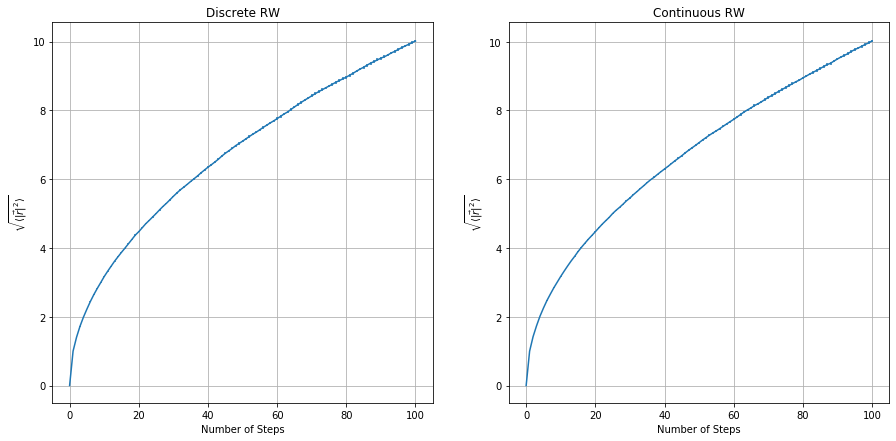

In [7]:
xD,yD, errorD=np.loadtxt("data_discreteRW.out", usecols=(0,1,2), delimiter=" ", unpack='true')
xC,yC, errorC=np.loadtxt("data_continuumRW.out", usecols=(0,1,2), delimiter=" ", unpack='true')
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(121)
ax1.errorbar(xD,yD,yerr=errorD)
ax1.set_title('Discrete RW')
ax1.set_xlabel('Number of Steps')
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}|^2 \rangle}$')
ax1.grid(True)

ax2 = fig.add_subplot(122)
ax2.errorbar(xC,yC,yerr=errorC)
ax2.set_title('Continuous RW')
ax2.set_xlabel('Number of Steps')
ax2.set_ylabel(r'$\sqrt{\langle |\vec{r}|^2 \rangle}$')
ax2.grid(True)


print("Last step", '\t','\t','\t','\t','\t','\t', 'Last step')
print("estimate:",yD[-1],", error:",errorD[-1],'\t','\t', '\t',"estimate:",yC[-1],", error:",errorC[-1],)

plt.show()

Come risulta evidente dal grafico, entrambe le funzioni ricordano $f(N)=k\sqrt{N}$, quindi possiamo eseguire un fit dei dati e trovare il migliore valore per il parametro $k$.

In [8]:
from scipy.optimize import curve_fit

def f(x,k):
    return k*np.sqrt(x)

p_optD,p_covD=curve_fit(f,xD,yD)
print("Optimized parameter k for discrete RW = ", p_optD, '±' , np.sqrt(np.diagonal(p_covD)))

p_optC,p_covC=curve_fit(f,xC,yC)
print("Optimized parameter k for continuous RW = ", p_optC, '±' , np.sqrt(np.diagonal(p_covC)))

Optimized parameter k for discrete RW =  [1.00342455] ± [0.00017971]
Optimized parameter k for continuous RW =  [1.00008949] ± [0.00019405]


Per una migliore evidenza della similarità delle due curve, facciamo un plot di $\sqrt{\langle |\vec{r}|^2 \rangle_{RW}}-k\sqrt{N}$.

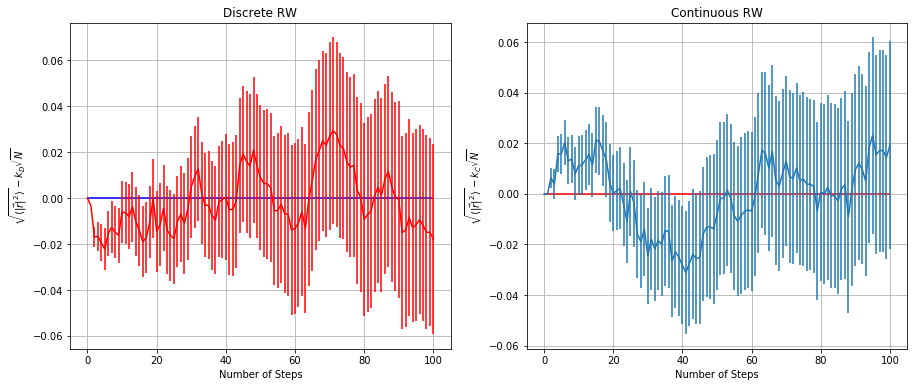

In [9]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
plt.hlines(0,0,100, color='blue')
ax1.errorbar(xD,yD-(p_optD*np.sqrt(xD)),yerr=errorD, color='red')
ax1.set_title('Discrete RW')
ax1.set_xlabel('Number of Steps')
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}|^2 \rangle}-k_D\sqrt{N}$')
ax1.grid(True)

ax2 = fig.add_subplot(122)
plt.hlines(0,0,100, color='red')
ax2.errorbar(xC,yC-(p_optC*np.sqrt(xC)),yerr=errorC)
ax2.set_title('Continuous RW')
ax2.set_xlabel('Number of Steps')
ax2.set_ylabel(r'$\sqrt{\langle |\vec{r}|^2 \rangle}-k_C\sqrt{N}$')
ax2.grid(True)

Vediamo dunque che la funzione fittata risulta compatibile con entrambi i tipi di RW, in quanto la differenza tra le due curve ad ogni step tende a 0. Notiamo che l'errore cresce al crescere del numero di step.

Dai risultati emerge inoltre il comportamento diffusivo dei Random Walks: un processo di tipo diffusivo è governato da un'equazione per la densità di probabilità del tipo $$\frac{\partial p(\vec{x},t)}{\partial t}=D\cdot\nabla^2 p(\vec{x},t)$$
dove D è una costante di diffusione. Dai calcoli sappiamo che una possibile soluzione dell'equazione potrebbe essere $$p(\vec{x},t)=\dfrac{1}{(4\pi Dt)^{1/2}}\exp\biggl[-\dfrac{\lVert\vec{x}\rVert^2}{4Dt}\biggr]$$ che rappresenta una distribuzione normale con varianza $\sigma^2=2Dt$ corrispondente al valore atteso di $\lVert \vec{x}\rVert^2$, dato che $\langle\lVert \vec{x}\rVert\rangle=0$ (notiamo che la varianza cresce con il tempo, poichè il walker tende ad allontanarsi sempre di più dal punto di partenza).

Poichè $t$ è legato al numero di step dalla relazione $t=\tau N$, dove $\tau$ è il tempo medio trascorso tra due step consecutivi, e $D=a^2/(2\tau)$, sostituendo si ha che
$$\sigma=\sqrt{2Dt}=\sqrt{a^2 N}=a\sqrt{N}=\sqrt{\langle\|\vec{x}\|^2\rangle}$$
che è il risultato che abbiamo ottenuto ponendo $a=1\approx k$ nelle simulazioni.